In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from init_mnist import MNIST
from ipywidgets import interact

from cw_attack import CW_Attack
from train_cnn_mnist import CNN, CNNTrain
import torchattacks

In [13]:
def torch_img_show(image, label):
  npimg = image.cpu().numpy()
  fig = plt.figure(figsize = (5, 15))
  plt.imshow(image, cmap='gray')
  plt.title(label)
  plt.show()

In [14]:
trainer = CNNTrain()
trainer.model_train()

model = trainer.model
#model.eval()
mnist = trainer.mnist

CNN model loaded


True Label: 4, Predcited: 4
CW(model_name=CNN, device=cpu, attack_mode=targeted(random), targeted=True, normalization_used=False, c=0.1, kappa=0, steps=1000, lr=0.01)


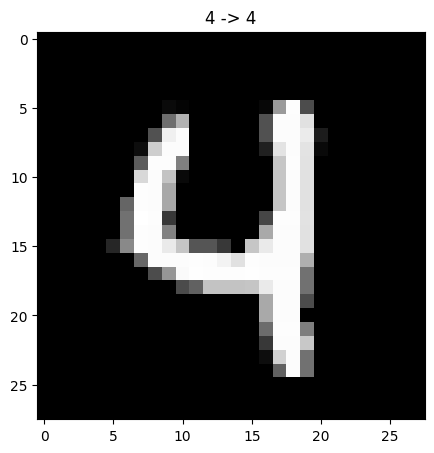

In [16]:
# Prepare data
images, labels = next(iter(mnist.test_loader))

true_y = labels.item()
pred_y = torch.argmax(model(images)).item()
print(f"True Label: {true_y}, Predcited: {pred_y}")

# CW Attack
attack = torchattacks.CW(model, c=0.1, steps=1000, lr=0.01)
attack.set_mode_targeted_random(10)
#attack.set_mode_targeted_least_likely(3)
print(attack)
adv_images = attack(images, labels)

# Evaluate
adv_pred = model(adv_images)
adv_pred_y = torch.argmax(adv_pred).item()

title = f"{true_y} -> {adv_pred_y}"
torch_img_show(adv_images[0][0], title)

FGSM(model_name=CNN, device=cpu, attack_mode=targeted(random), targeted=True, normalization_used=False, eps=0.01)


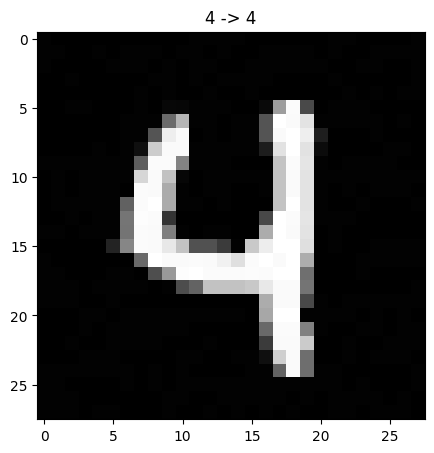

In [17]:
# FGSM Attack
attack = torchattacks.FGSM(model, 0.01)
attack.set_mode_targeted_random(10)
#attack.set_mode_targeted_least_likely(3)
print(attack)
adv_images = attack(images, labels)

# Evaluate
adv_pred = model(adv_images)
adv_pred_y = torch.argmax(adv_pred).item()

title = f"{true_y} -> {adv_pred_y}"
torch_img_show(adv_images[0][0], title)

PGD(model_name=CNN, device=cpu, attack_mode=targeted(random), targeted=True, normalization_used=False, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


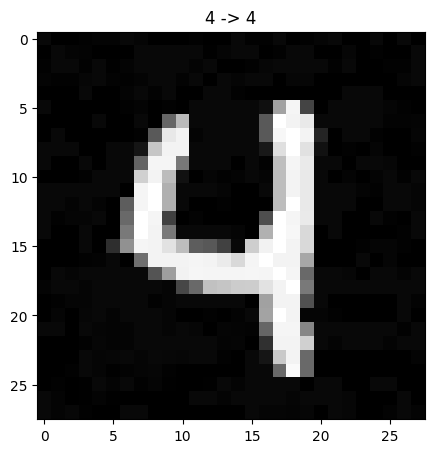

In [18]:
# PGD Attack
attack = torchattacks.PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
attack.set_mode_targeted_random(10)
#attack.set_mode_targeted_least_likely(3)
print(attack)
adv_images = attack(images, labels)

# Evaluate
adv_pred = model(adv_images)
adv_pred_y = torch.argmax(adv_pred).item()

title = f"{true_y} -> {adv_pred_y}"
torch_img_show(adv_images[0][0], title)